In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [80]:
df = pd.read_csv('../data/raw/churn_raw.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [81]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [82]:
df.drop(columns=['customerID'], inplace=True)

The `customerID` column was removed from the dataset as it is a unique identifier
and does not carry any predictive information about customer behavior.

In [83]:
for col in df.columns:
    converted = pd.to_numeric(df[col], errors='coerce')

    invalid_values = df.loc[converted.isna() & df[col].notna(),col].unique()

    if len(invalid_values) > 0:
        print(f'{col}: {invalid_values}')

gender: <StringArray>
['Female', 'Male']
Length: 2, dtype: str
Partner: <StringArray>
['Yes', 'No']
Length: 2, dtype: str
Dependents: <StringArray>
['No', 'Yes']
Length: 2, dtype: str
PhoneService: <StringArray>
['No', 'Yes']
Length: 2, dtype: str
MultipleLines: <StringArray>
['No phone service', 'No', 'Yes']
Length: 3, dtype: str
InternetService: <StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: str
OnlineSecurity: <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
OnlineBackup: <StringArray>
['Yes', 'No', 'No internet service']
Length: 3, dtype: str
DeviceProtection: <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
TechSupport: <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
StreamingTV: <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
StreamingMovies: <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str
Contract: <StringArray>
['Month-to-month', 'One year', '

We performed a numeric consistency check to identify non-numeric values
in numerical features. Invalid values were detected in the TotalCharges
column and handled accordingly.

In [84]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
binary_yes_no = ['Partner', 'Dependents', 'PhoneService', 'Churn', 'PaperlessBilling']

for col in binary_yes_no:
    df[col] = df[col].str.strip().map({'No': 0, 'Yes': 1})

df['gender'] = df['gender'].str.strip().map({'Female': 0, 'Male': 1})

In [86]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [87]:
categorical_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

for col in categorical_cols:
    df[col] = df[col].str.strip()

df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

# sanity check
print(df_encoded.shape)
print(df_encoded.isna().sum().sum())

df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].fillna(0)
df_encoded['TotalCharges'].isna().sum()

(7043, 31)
0


np.int64(0)

In [88]:
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,False,False,False,False,False,False,False,False,False,True


In [89]:
# нет ли object-колонок
print(df_encoded.select_dtypes(include='object').columns)

# быстрый взгляд на типы
df_encoded.dtypes.value_counts()


Index([], dtype='str')


bool       21
int64       8
float64     2
Name: count, dtype: int64

In [90]:
df_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  MultipleLines_Y

In [92]:
from pathlib import Path
import pandas as pd

def save_processed_data(df: pd.DataFrame, filename: str = "processed.csv") -> None:
    project_root = Path().resolve().parents[0]
    processed_dir = project_root / "data" / "processed"
    processed_dir.mkdir(parents=True, exist_ok=True)

    output_path = processed_dir / filename
    df.to_csv(output_path, index=False)

save_processed_data(df_encoded)


Preprocessing is complete. The dataset contains no missing values,
all categorical features are encoded, and all features are numeric
and ready for modeling.


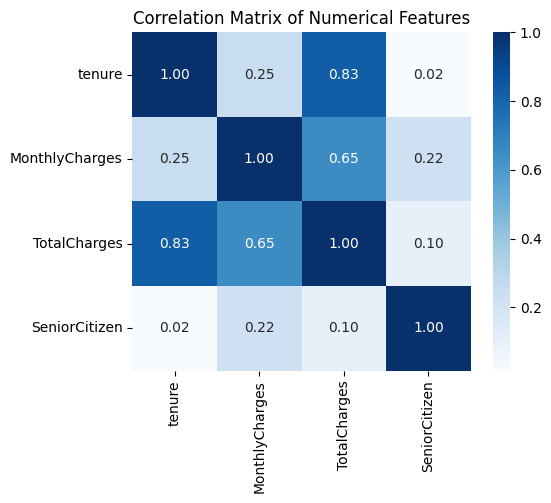

In [ ]:
reports_dir = Path('../reports')
reports_dir.mkdir(parents=True, exist_ok=True)



corr_cols = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'SeniorCitizen'
]

corr_matrix = df_encoded[corr_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    square=True
)

plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()

plt.savefig(
    reports_dir / 'correlation_matrix_numeric.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()


### Correlation Analysis Conclusion

A correlation analysis was performed on the main numerical features to
understand their relationships and identify potential multicollinearity.

The analysis focused on the following features:
- tenure
- MonthlyCharges
- TotalCharges
- SeniorCitizen

These features were selected because they represent core numerical
characteristics of customer behavior and billing.

The results show a strong positive correlation between tenure and
TotalCharges, indicating that TotalCharges is largely derived from
customer tenure and accumulated billing over time. This confirms the
expected business relationship between these variables.

MonthlyCharges exhibits a moderate correlation with TotalCharges, while
SeniorCitizen shows only weak correlations with other numerical features.

Based on this analysis, the correlation matrix was used primarily for
interpretability and understanding feature relationships rather than for
automatic feature removal. The insights gained help guide feature
selection and interpretation in subsequent modeling steps.
